

## Construindo um Modelo de Classificação - Regressão Logística e Random Forest

# _BUSINESS UNDERSTANDING_

## **Previsão de Cancelamento - Churn - através do Método de Classificação**

---

## **Sumário Executivo**

### **Objetivo**
Este projeto tem como objetivo desenvolver um modelo de classificação para prever a probabilidade de cancelamento de assinaturas (churn) em uma plataforma de streaming. A meta principal é identificar usuários com alta chance de cancelamento, permitindo ações proativas para retenção de clientes e redução de perdas.

---

### **Metodologia**
Foi utilizada a abordagem **CRISP-DM (Cross Industry Standard Process for Data Mining)**, que guiou todas as etapas do projeto. Abaixo, destacam-se os passos seguidos:

1. **Entendimento do Negócio**: Identificação de variáveis-chave como idade, número de dispositivos conectados e avaliação média de conteúdos.

2. **Pré-Processamento**: Tratamento de valores ausentes, criação de novas features a partir das variáveis do registro de dados, transformação de variáveis e análise exploratória de dados.

3. **Modelagem**: Ajuste de hiperparâmetros com foco no recall, priorizando a identificação de usuários propensos ao churn.

4. **Validação**: Análise atravéz da matriz de confusão, análise de métricas como AUC-ROC e aplicação de validação cruzada.

5. **Tomada de Decisão**: Implementação de thresholds personalizados para otimização dos resultados em cenários de custo-benefício.


---

### **Resultados**
Os resultados detalhados podem ser encontrados no relatório completo - se encontra no final do projeto -, incluindo métricas de avaliação, insights das variáveis mais importantes e recomendações para os próximos passos.

# _DATA UNDERSTANDING_

#### Importando as bibliotecas e funções

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from data.load_data import load_data
from data.process_data import analisar_qualidade_dados, exibir_estatisticas, generate_class_table, calcular_faixa_por_variavel, comparar_variavel_com_target
from visualizations.plot_results import plot_continuous_data, plot_discrete_data,  plot_class_distribution

#### Carregando base de dados

In [2]:
# # Carregar e processar os dados
df = load_data('streaming_data.csv')

#### Análise descritiva

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [4]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [5]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


#### Análise de qualidade dos dados

In [6]:
analisar_qualidade_dados(df)

Coluna,Zeros,Valores Vazios,Esparsidade
Age,0,11277,14.48%
Gender,0,14516,18.64%
Time_on_platform,5,21420,27.51%
Devices_connected,0,25188,32.34%
Subscription_type,0,25221,32.38%
Num_streaming_services,0,68312,87.71%
Num_active_profiles,0,0,0.00%
Avg_rating,0,17270,22.17%
Churned,46285,16736,80.92%
User_id,0,0,0.00%


#### Medidas estatíticas de resumo por variável

Age

Tendência Central,Medidas de Dispersão
Média:43.51,Mínimo:18.00
Mediana:43.00,Máximo:69.00
Moda:25.00,Desvio Padrão:15.04
Q1:30.00,Variância:226.30
Q2:43.00,Amplitude:51.00
Q3:57.00,DQ (IQR):27.00


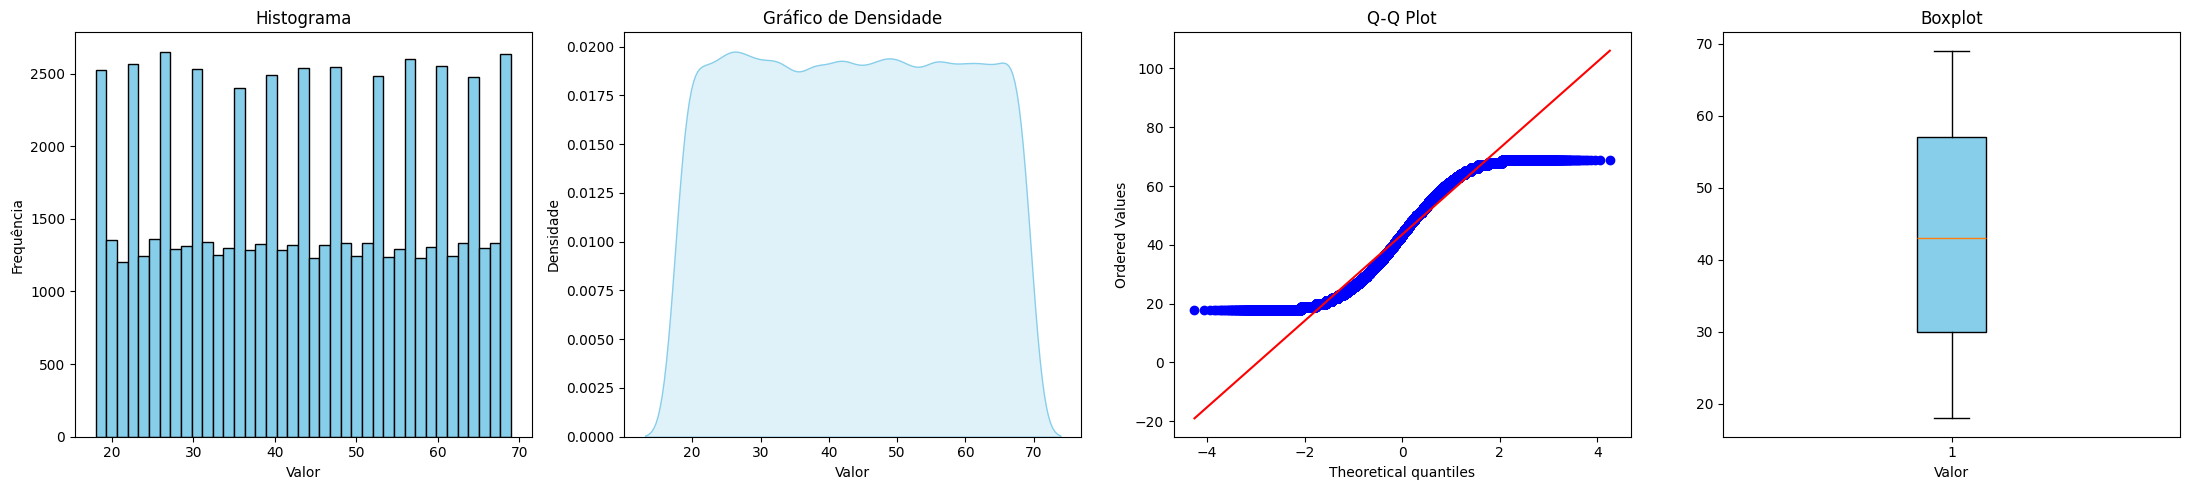

In [7]:
exibir_estatisticas(df['Age'])
plot_continuous_data(df['Age'])

Gender

Classe,Contagem,Proporção (%)
Male,31796.0,50.18
Female,31572.0,49.82


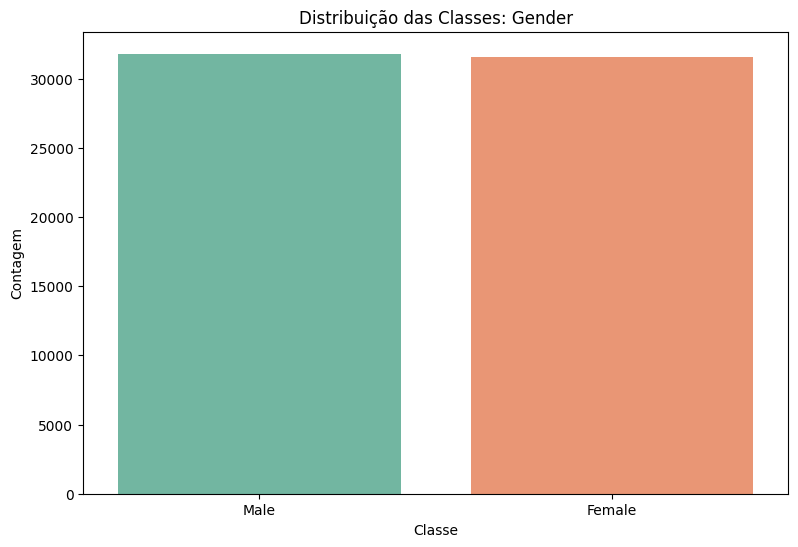

In [8]:
generate_class_table(df, 'Gender')
plot_class_distribution(df, 'Gender')

Time_on_platform

Tendência Central,Medidas de Dispersão
Média:4385.85,Mínimo:0.00
Mediana:4384.00,Máximo:8759.00
Moda:1671.00,Desvio Padrão:2526.58
Q1:2196.00,Variância:6383610.84
Q2:4384.00,Amplitude:8759.00
Q3:6573.00,DQ (IQR):4377.00


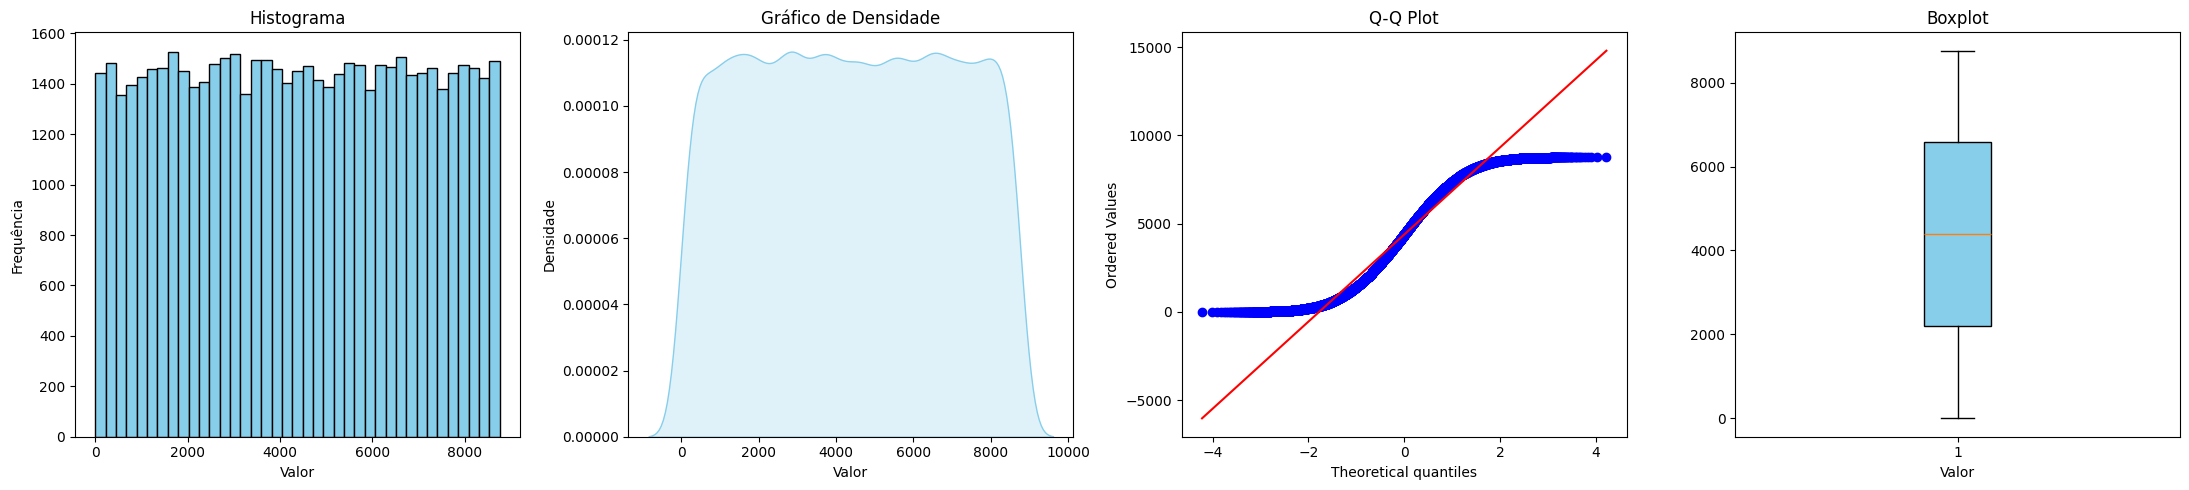

In [9]:
exibir_estatisticas(df['Time_on_platform'])
plot_continuous_data(df['Time_on_platform'])  

Num_streaming_services

Tendência Central,Medidas de Dispersão
Média:2.50,Mínimo:1.00
Mediana:2.00,Máximo:4.00
Moda:2.00,Desvio Padrão:1.12
Q1:1.00,Variância:1.26
Q2:2.00,Amplitude:3.00
Q3:4.00,DQ (IQR):3.00


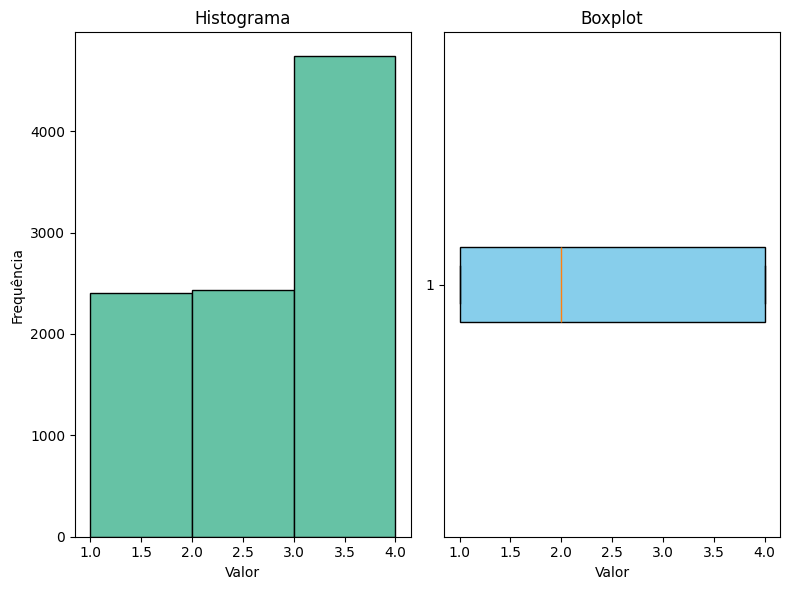

Classe,Contagem,Proporção (%)
2.0,2433.0,25.42
4.0,2413.0,25.21
1.0,2401.0,25.08
3.0,2325.0,24.29


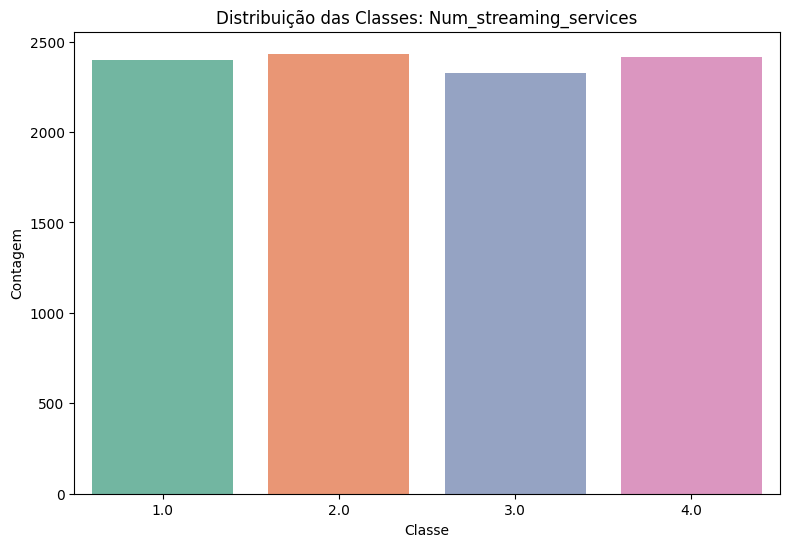

In [10]:
exibir_estatisticas (df['Num_streaming_services'])   
plot_discrete_data(df['Num_streaming_services']) 
generate_class_table(df, 'Num_streaming_services')
plot_class_distribution(df, 'Num_streaming_services')

Subscription_type

Classe,Contagem,Proporção (%)
Premium,17625.0,33.47
Basic,17527.0,33.28
Standard,17511.0,33.25


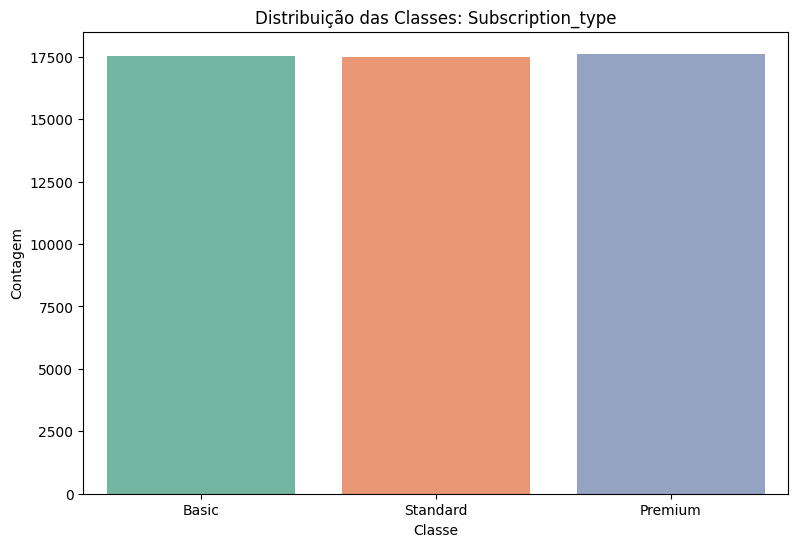

In [11]:
generate_class_table(df, 'Subscription_type')
plot_class_distribution(df, 'Subscription_type')

Devices_connected

Tendência Central,Medidas de Dispersão
Média:3.00,Mínimo:1.00
Mediana:3.00,Máximo:5.00
Moda:1.00,Desvio Padrão:1.41
Q1:2.00,Variância:2.00
Q2:3.00,Amplitude:4.00
Q3:4.00,DQ (IQR):2.00


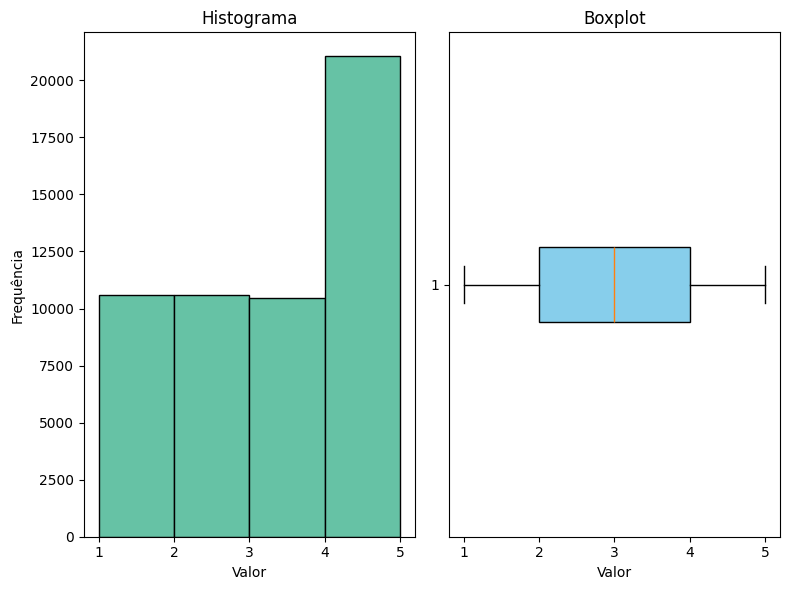

Classe,Contagem,Proporção (%)
1.0,10587.0,20.09
4.0,10587.0,20.09
2.0,10583.0,20.08
3.0,10476.0,19.88
5.0,10463.0,19.86


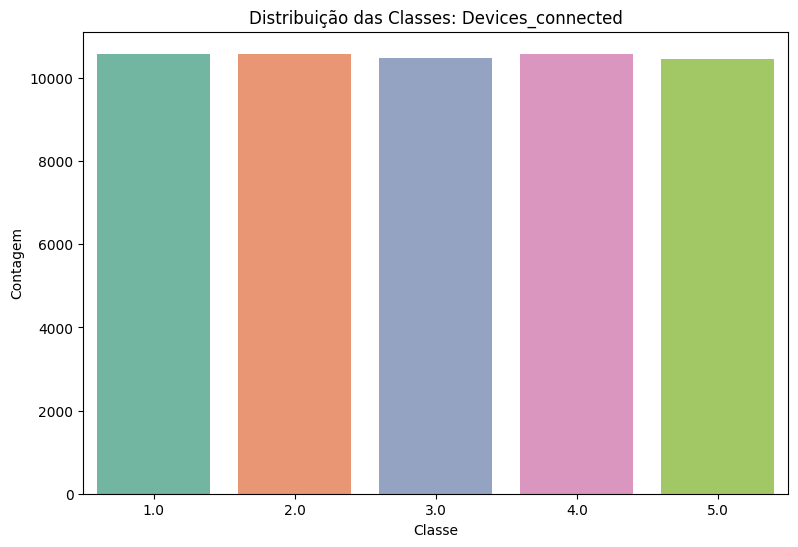

In [12]:
exibir_estatisticas (df['Devices_connected'])   
plot_discrete_data(df['Devices_connected']) 
generate_class_table(df, 'Devices_connected')
plot_class_distribution(df, 'Devices_connected')

Avg_rating

Tendência Central,Medidas de Dispersão
Média:3.00,Mínimo:1.00
Mediana:3.00,Máximo:5.00
Moda:4.00,Desvio Padrão:1.22
Q1:2.00,Variância:1.49
Q2:3.00,Amplitude:4.00
Q3:4.00,DQ (IQR):2.00


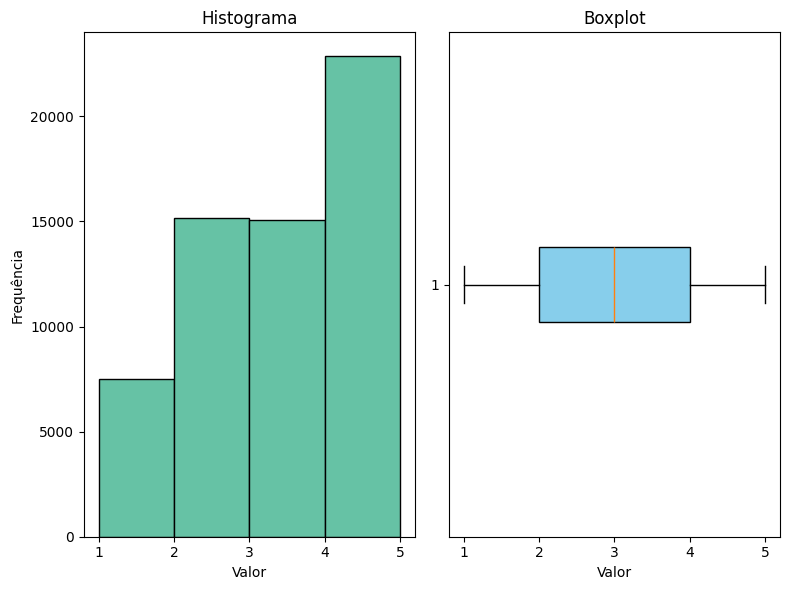

Classe,Contagem,Proporção (%)
4.0,15420.0,25.44
2.0,15151.0,25.00
3.0,15088.0,24.89
1.0,7523.0,12.41
5.0,7432.0,12.26


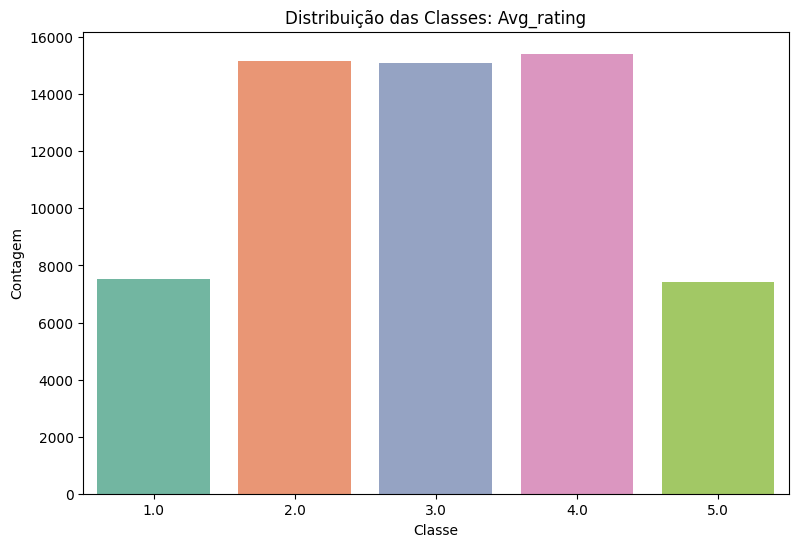

In [13]:
df['Avg_rating']=round(df['Avg_rating'])
exibir_estatisticas (df['Avg_rating'])   
plot_discrete_data(df['Avg_rating']) 
generate_class_table(df, 'Avg_rating')
plot_class_distribution(df, 'Avg_rating')

Churned

Classe,Contagem,Proporção (%)
0.0,46285.0,75.69
1.0,14863.0,24.31


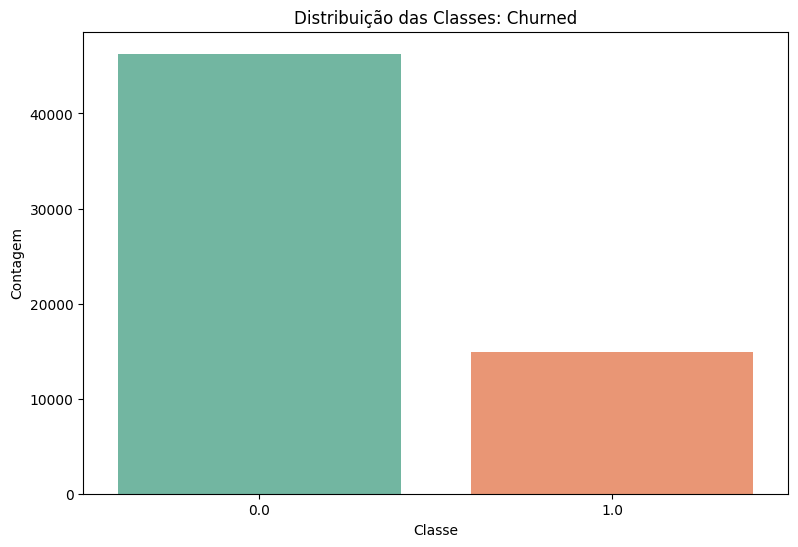

In [14]:
generate_class_table(df, 'Churned')
plot_class_distribution(df, 'Churned')

#### Análise individual das _features_ em relação ao _target_

Faixa de Age por Churned

In [15]:
# dividindo dados contínuos por faixa
calcular_faixa_por_variavel(df,'Age', 'Churned', 10, 1, 'desc')

,Variable_bins,Total_Target
10,Falta de Dados,2108
9,Faixa 10: 63-69,1509
0,Faixa 1: 18-23,1454
1,Faixa 2: 23-28,1276
5,Faixa 6: 43-48,1251
6,Faixa 7: 48-53,1248
2,Faixa 3: 28-33,1238
8,Faixa 9: 58-63,1212
3,Faixa 4: 33-38,1200
4,Faixa 5: 38-43,1186


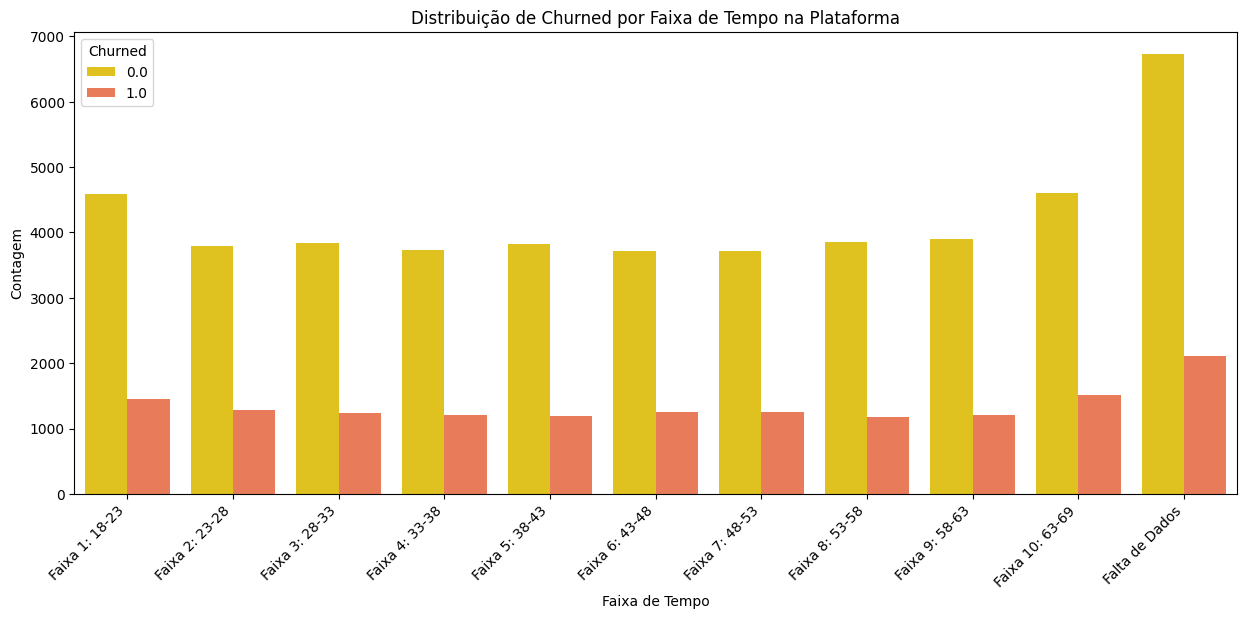

In [16]:
# Criar o gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Variable_bins', hue='Churned', data=df, palette=["Gold", "#FF7043"])
plt.title('Distribuição de Churned por Faixa de Tempo na Plataforma')
plt.xticks(rotation=45, ha='right')  # Ajustar rótulos do eixo x para ficarem legíveis
plt.xlabel('Faixa de Tempo')
plt.ylabel('Contagem')
plt.show()

Faixa de Time_on_platform por Churned

In [17]:
# dividindo dados contínuos por faixa
calcular_faixa_por_variavel(df,'Time_on_platform', 'Churned', 21, 1, 'desc')

,Variable_bins,Total_Target
21,Falta de Dados,3994
6,Faixa 7: 2502-2919,589
10,Faixa 11: 4170-4588,559
4,Faixa 5: 1668-2085,551
3,Faixa 4: 1251-1668,537
8,Faixa 9: 3336-3753,536
15,Faixa 16: 6256-6673,531
1,Faixa 2: 417-834,529
16,Faixa 17: 6673-7090,526
13,Faixa 14: 5422-5839,524


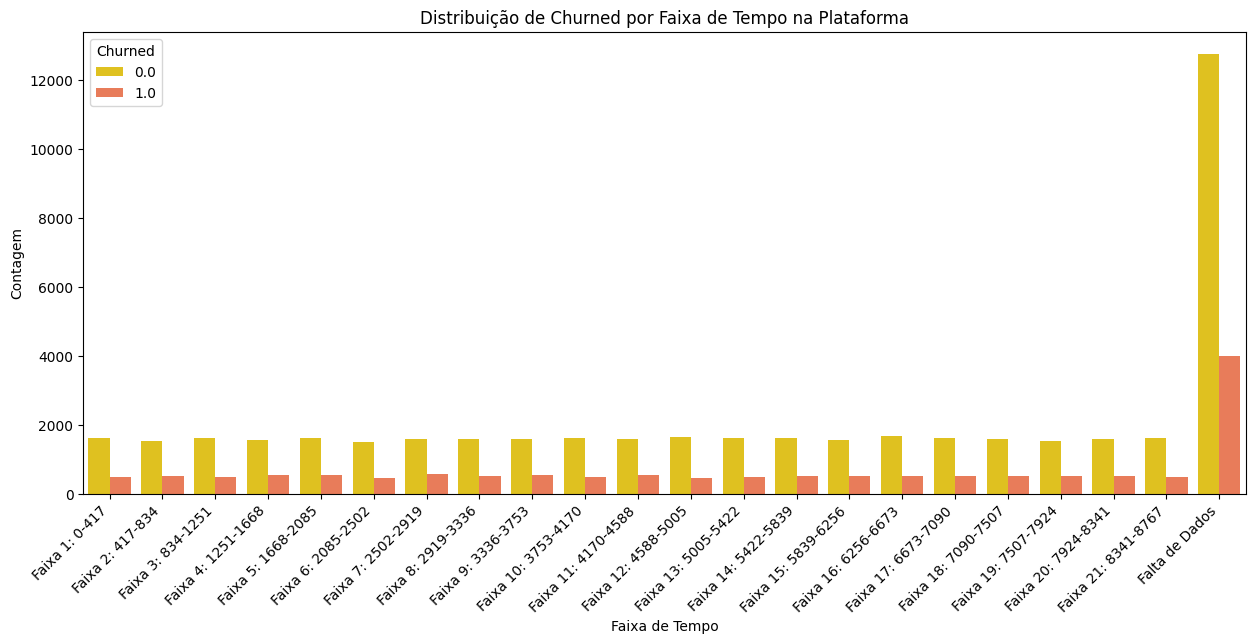

In [18]:
# Criar o gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Variable_bins', hue='Churned', data=df, palette=["Gold", "#FF7043"])
plt.title('Distribuição de Churned por Faixa de Tempo na Plataforma')
plt.xticks(rotation=45, ha='right')  # Ajustar rótulos do eixo x para ficarem legíveis
plt.xlabel('Faixa de Tempo')
plt.ylabel('Contagem')
plt.show()

Gender por Chuned

Categoria,Total de Churned,Proporção (%)
Female,6025.0,49.81
Male,6072.0,50.19


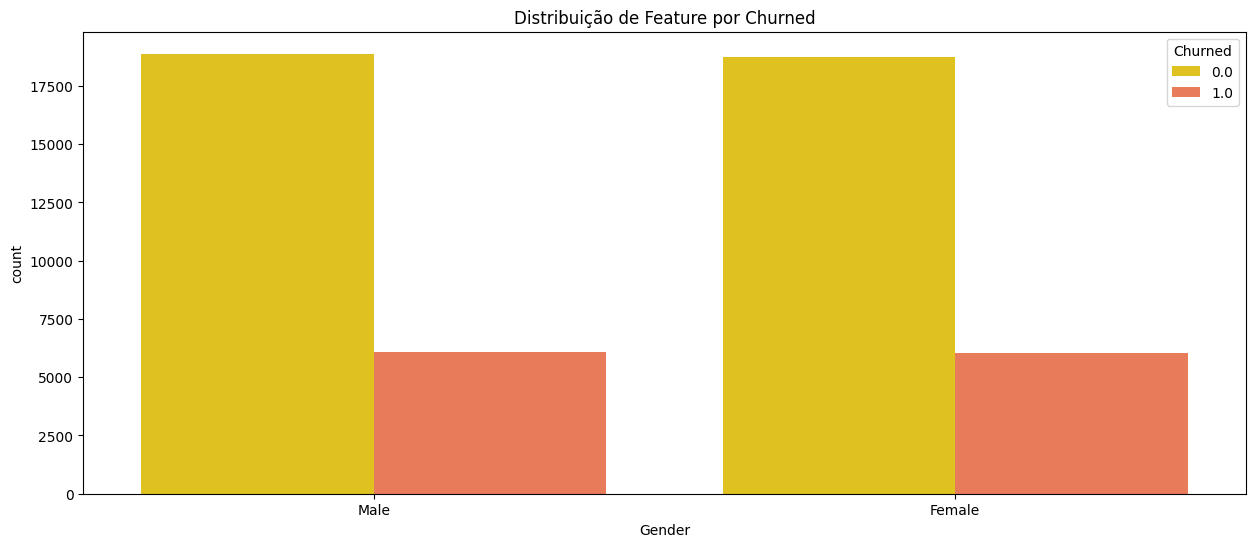

In [19]:
comparar_variavel_com_target(df, 'Gender', 'Churned')


# Criar um gráfico de barras para Gender por Churned
plt.figure(figsize=(15, 6))
sns.countplot(x='Gender', hue='Churned', data=df, palette=["Gold", "#FF7043"])
plt.title('Distribuição de Feature por Churned')
plt.show()

Devices_connected por Churned

Categoria,Total de Churned,Proporção (%)
1.0,2059.0,20.53
2.0,1941.0,19.35
3.0,1969.0,19.63
4.0,2058.0,20.52
5.0,2004.0,19.98


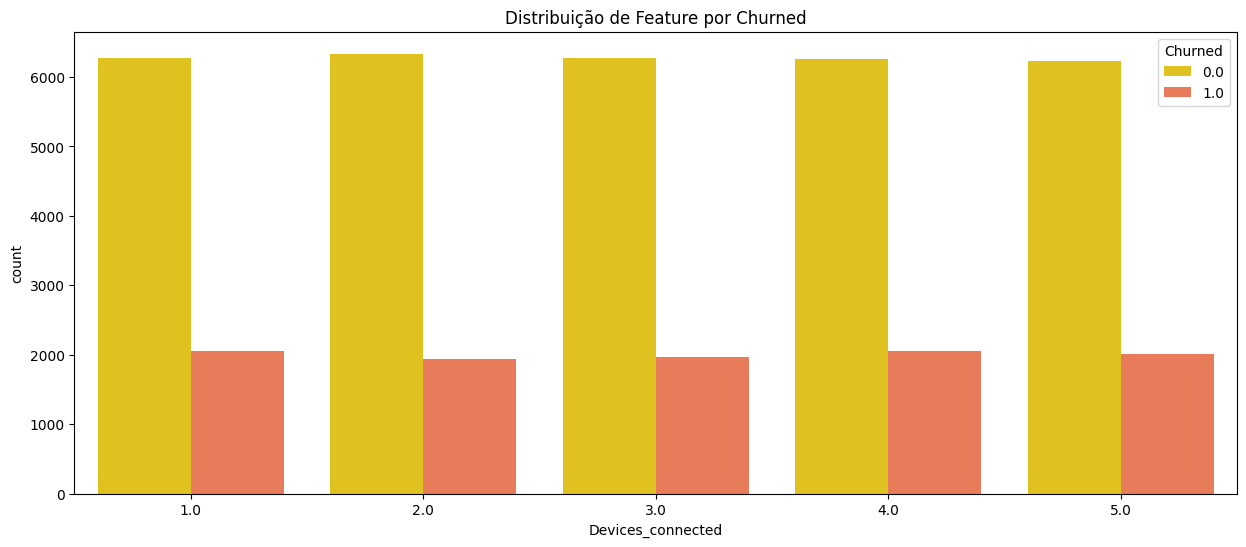

In [20]:
comparar_variavel_com_target(df, 'Devices_connected', 'Churned')

# Criar um gráfico de barras para Gender por Churned
plt.figure(figsize=(15, 6))
sns.countplot(x='Devices_connected', hue='Churned', data=df, palette=["Gold", "#FF7043"])
plt.title('Distribuição de Feature por Churned')
plt.show()

Devices_connected por Churned

Categoria,Total de Churned,Proporção (%)
Basic,3396.0,33.67
Premium,3358.0,33.30
Standard,3331.0,33.03


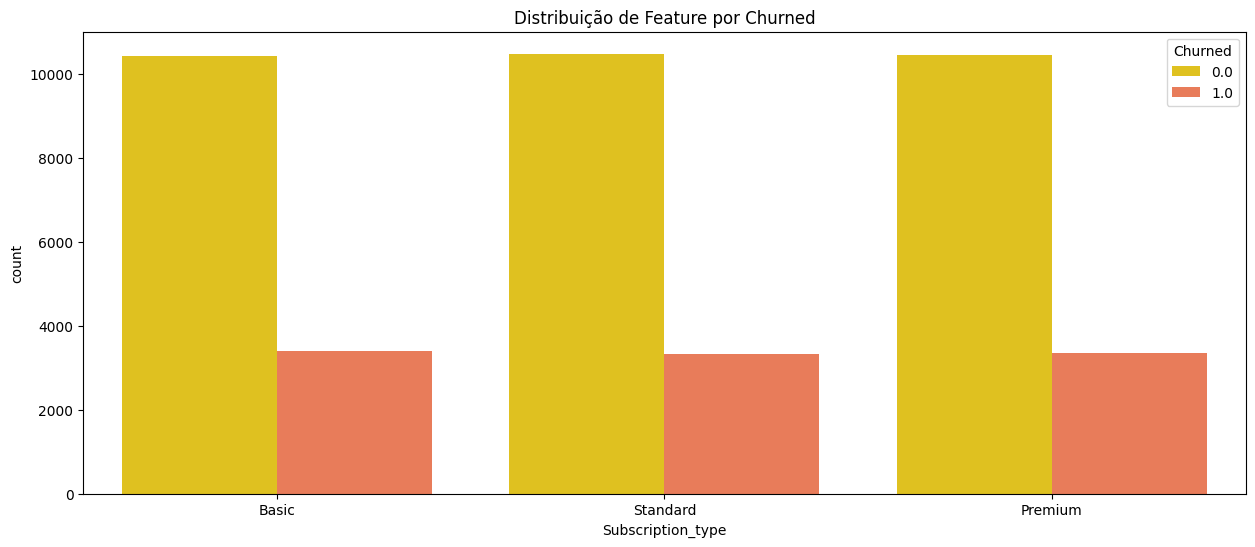

In [21]:
comparar_variavel_com_target(df, 'Subscription_type', 'Churned')
# Criar um gráfico de barras para Gender por Churned
plt.figure(figsize=(15, 6))
sns.countplot(x='Subscription_type', hue='Churned', data=df, palette=["Gold", "#FF7043"])
plt.title('Distribuição de Feature por Churned')
plt.show()

Num_streaming_services por Churned

Categoria,Total de Churned,Proporção (%)
1.0,466.0,24.71
2.0,479.0,25.40
3.0,467.0,24.76
4.0,474.0,25.13


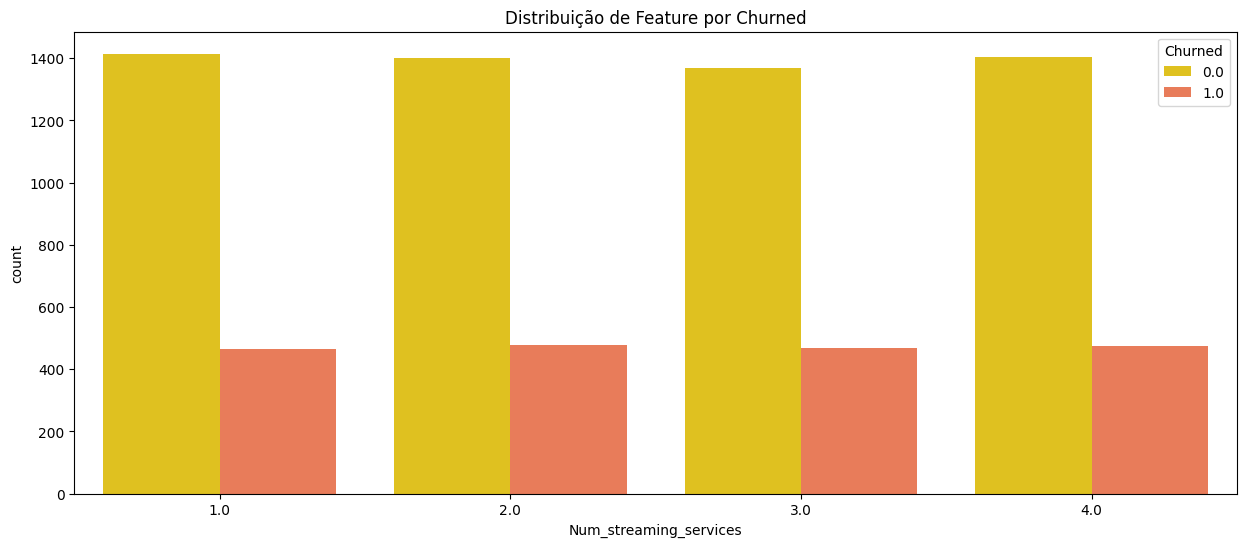

In [22]:
comparar_variavel_com_target(df, 'Num_streaming_services', 'Churned')

var_categorico = 'Num_streaming_services'

# Criar um gráfico de barras para Gender por Churned
plt.figure(figsize=(15, 6))
sns.countplot(x=var_categorico, hue='Churned', data=df, palette=["Gold", "#FF7043"])
plt.title('Distribuição de Feature por Churned')
plt.show()

Num_active_profiles por Churned

Categoria,Total de Churned,Proporção (%)
1.0,2888.0,19.43
2.0,3004.0,20.21
3.0,2890.0,19.44
4.0,3025.0,20.35
5.0,3056.0,20.56


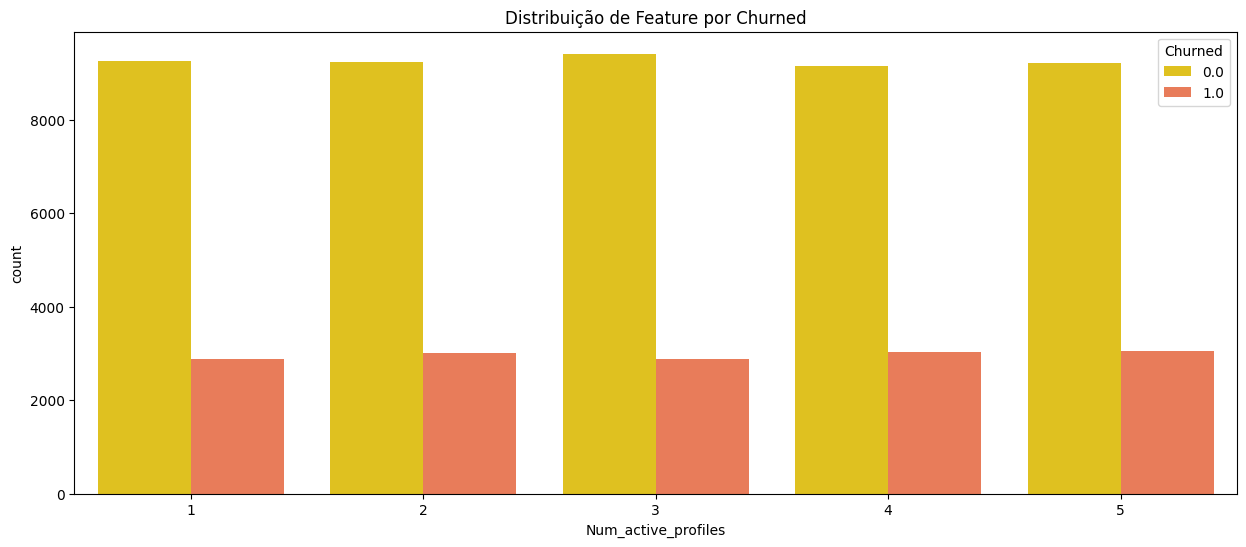

In [23]:
comparar_variavel_com_target(df, 'Num_active_profiles', 'Churned')

var_categorico = 'Num_active_profiles'

# Criar um gráfico de barras para Gender por Churned
plt.figure(figsize=(15, 6))
sns.countplot(x=var_categorico, hue='Churned', data=df, palette=["Gold", "#FF7043"])
plt.title('Distribuição de Feature por Churned')
plt.show()

Avg_rating por Churned

Categoria,Total de Churned,Proporção (%)
1.0,1424.0,12.24
2.0,2942.0,25.28
3.0,2778.0,23.87
4.0,3000.0,25.78
5.0,1492.0,12.82


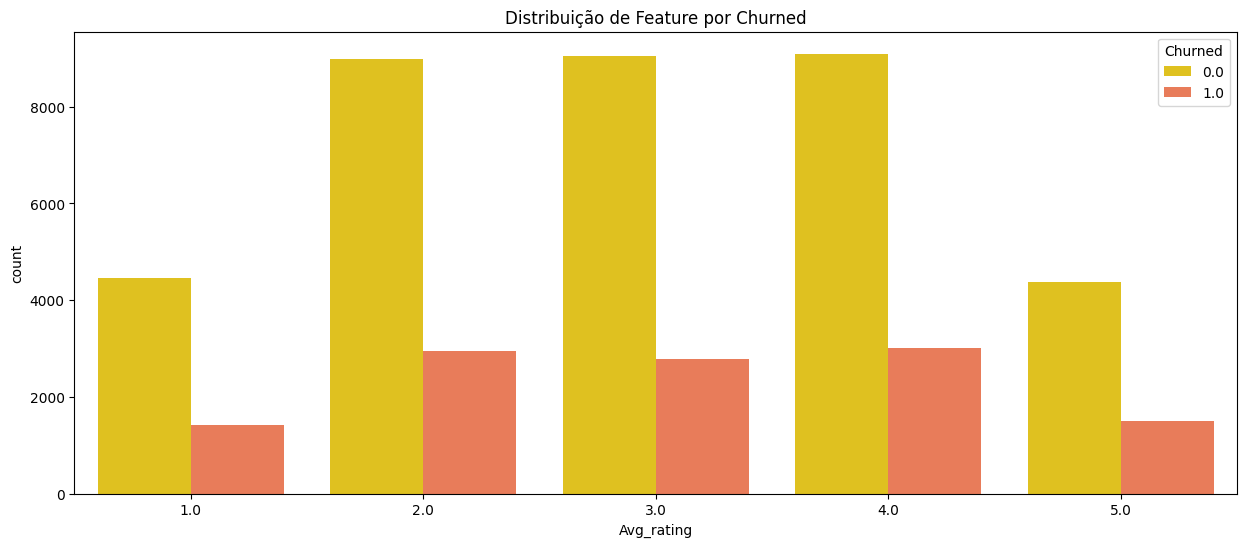

In [24]:
comparar_variavel_com_target(df, 'Avg_rating', 'Churned')
var_categorico = 'Avg_rating'

# Criar um gráfico de barras para Gender por Churned
plt.figure(figsize=(15, 6))
sns.countplot(x=var_categorico, hue='Churned', data=df, palette=["Gold", "#FF7043"])
plt.title('Distribuição de Feature por Churned')
plt.show()

#### Análise das _features_ em relação ao _target_

Análise gráfica

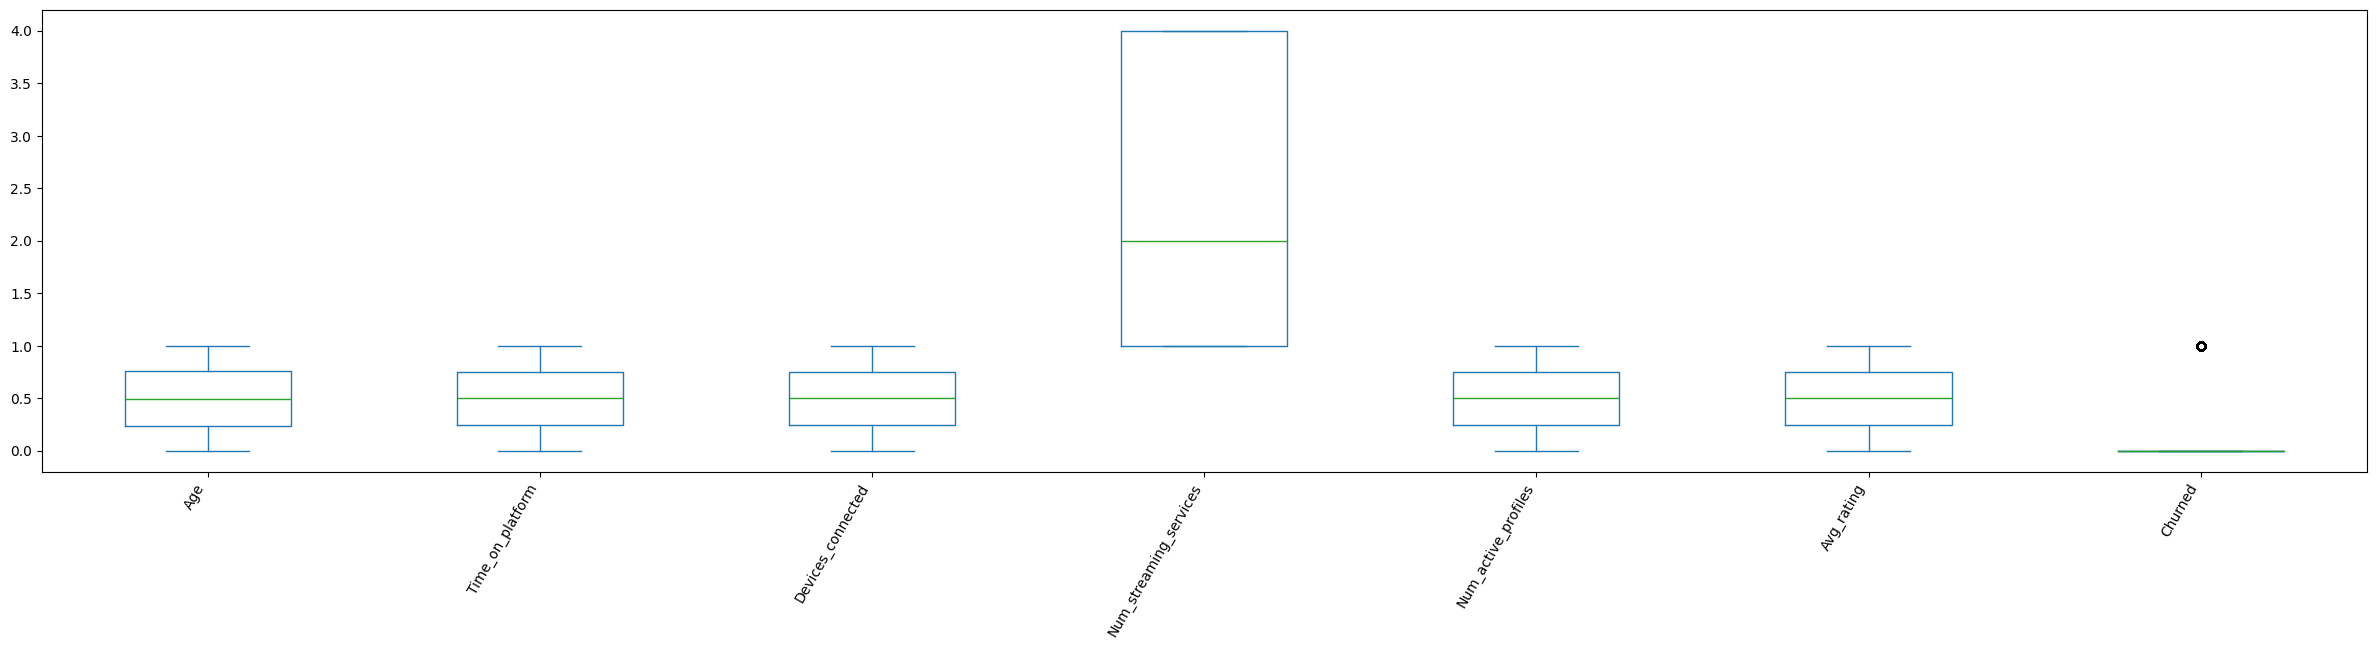

In [25]:
df_scaler = df.copy()
# Selecionar as colunas para escalonamento
columns_to_scale = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_active_profiles', 'Avg_rating']
# Inicializar o MinMaxScaler
scaler = MinMaxScaler()
# Aplicar o escalonamento
df_scaler[columns_to_scale] = scaler.fit_transform(df_scaler[columns_to_scale])

df_scaler.plot.box(figsize=(30, 6))
plt.xticks(rotation=60, ha='right');

#### Análise de correlação entre variáveis numéricas

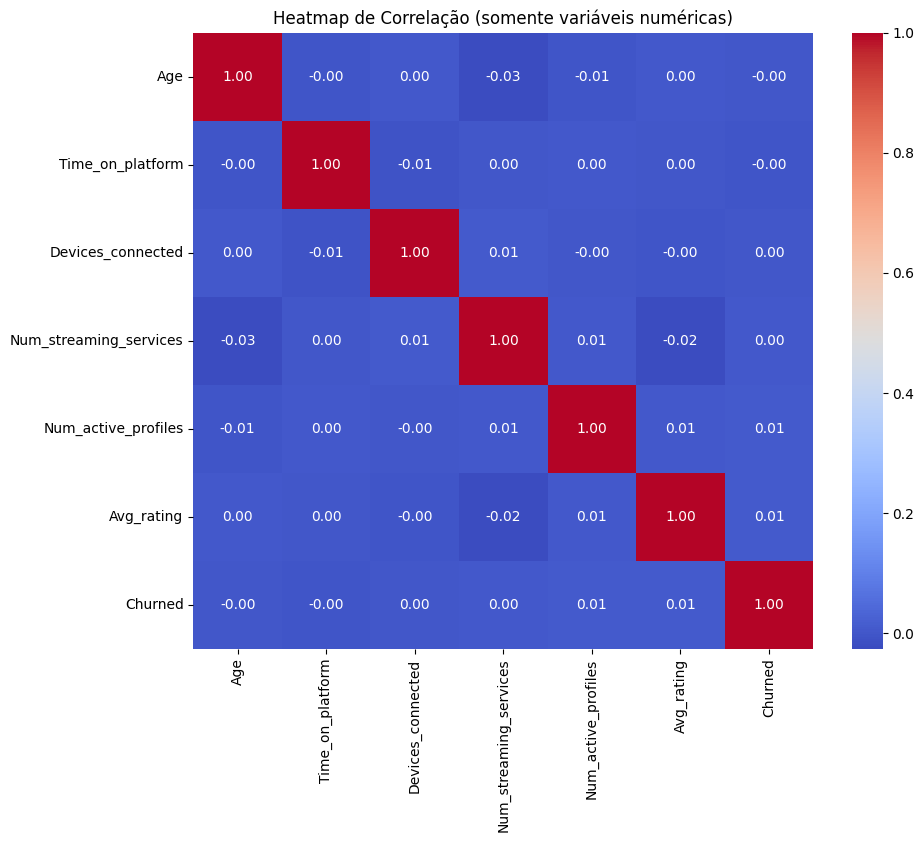

In [26]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calculando a matriz de correlação
corr = numeric_df.corr()

# Plotando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap de Correlação (somente variáveis numéricas)")
plt.show()